In [ ]:
import math
import numpy as np
import astropy.cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.cosmology import Planck18
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [190]:
# constants
# LRG_z_max = 1.6979 (outlier)
# LRG_z_min = -0.0023
# BGS_z_max = 1.6979 (outlier)
# BGS_z_min = -0.0043
LRG_z_mean = 0.6851
LRG_z_max = 1.25
BGS_z_mean = 0.2516
BGS_z_max = 0.7
apature_d = 1.5 # in arcseconds

In [191]:
def vary_angular_sep(z_mean,z_max):
    R_s = 70 * (u.kpc)
    # distances
    d_l_mean = Planck18.angular_diameter_distance(z_mean)
    d_l_max = Planck18.angular_diameter_distance(z_max)
    # angular separation for BGS/LOA based on skyfiber to galaxy center distance plots
    # find r values
    if (z_mean == LRG_z_mean ):
        theta_LRG = np.linspace(0.0007909274985968819*3600*4.8481e-6, 0.005555543236270858*3600*4.8481e-6,1000000)
        r_mean = d_l_mean* np.tan(theta_LRG)
        r_max = d_l_max* np.tan(theta_LRG)
    else:
        theta_BGS = np.linspace(0.0011956075825011979*3600*4.8481e-6, 0.005555551126463086*3600*4.8481e-6,1000000)
        r_mean = d_l_mean* np.tan(theta_BGS)
        r_max = d_l_max* np.tan(theta_BGS)

    # ρ_mean/ρ_0
    ratio_mean = r_mean/ (R_s.to(u.Mpc) )
    ρ_mean = 1/(ratio_mean * (1+ratio_mean)**2)

    # ρ_max/ρ_0
    ratio_max = r_max/(R_s.to(u.Mpc) )
    ρ_max = 1/(ratio_max * (1+ratio_max)**2)
    
    # plot mean and max on same graph
    plt.figure(figsize=(14, 6))
    plt.plot(np.log10(ratio_mean),np.log10(ρ_mean), label = "mean redshift",alpha = 0.7)
    plt.plot(np.log10(ratio_max),np.log10(ρ_max), label = "max redshift", alpha = 0.7)
    plt.xlabel(r'$log(r_{mean} / R_s)$')
    plt.ylabel(r'$log(ρ / ρ_{0})$')
    if (z_mean == LRG_z_mean ):
        plt.title(r'LRG NFW Density Profile for $R_s$' f'={R_s}')
    else:
        plt.title(r'BGS NFW Density Profile for $R_s$' f'={R_s}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # plot ratio
    # Find common r range (where curves overlap)
    r_min_common = max(r_mean.min(), r_max.min())
    r_max_common = min(r_mean.max(), r_max.max())

    # Create common r grid
    r_common = np.linspace(r_min_common, r_max_common, 1000000)

    # Interpolate both density profiles onto common grid
    ρ_mean_interp = interp1d(r_mean.value, ρ_mean, kind='cubic')(r_common.value)
    ρ_max_interp = interp1d(r_max.value, ρ_max, kind='cubic')(r_common.value)

    # Plot the ratio at same physical radius
    plt.figure(figsize=(14, 6))
    plt.plot(r_common, ρ_mean_interp / ρ_max_interp)
    plt.xlabel(r'$r$ [Mpc]')
    plt.ylabel(r'$\rho(z_{mean}) / \rho(z_{max})$')
    plt.grid(True)
    if (z_mean == LRG_z_mean):
        plt.title(r'LRG Density Ratio for $R_s$' f'={R_s}')
    else:
        plt.title(r'BGS Density Ratio for $R_s$' f'={R_s}')
    plt.ylim(-1,1.5)
    plt.show()

    return ρ_mean, r_mean, ρ_max,r_max

LRG:


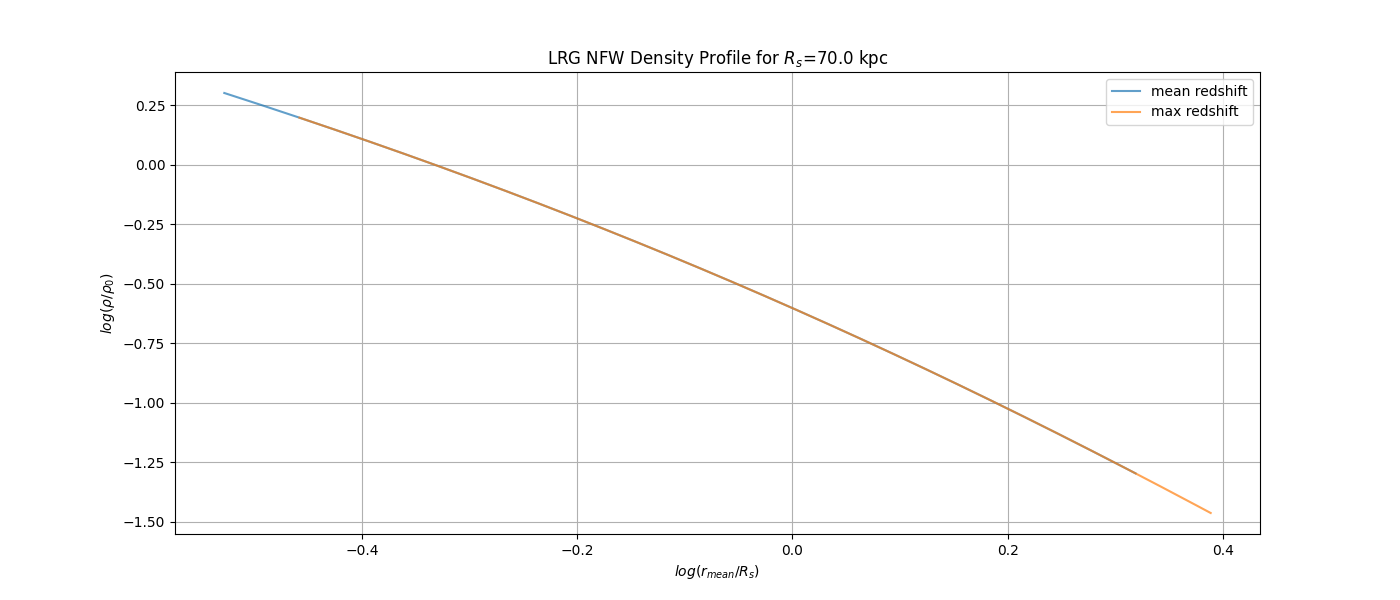

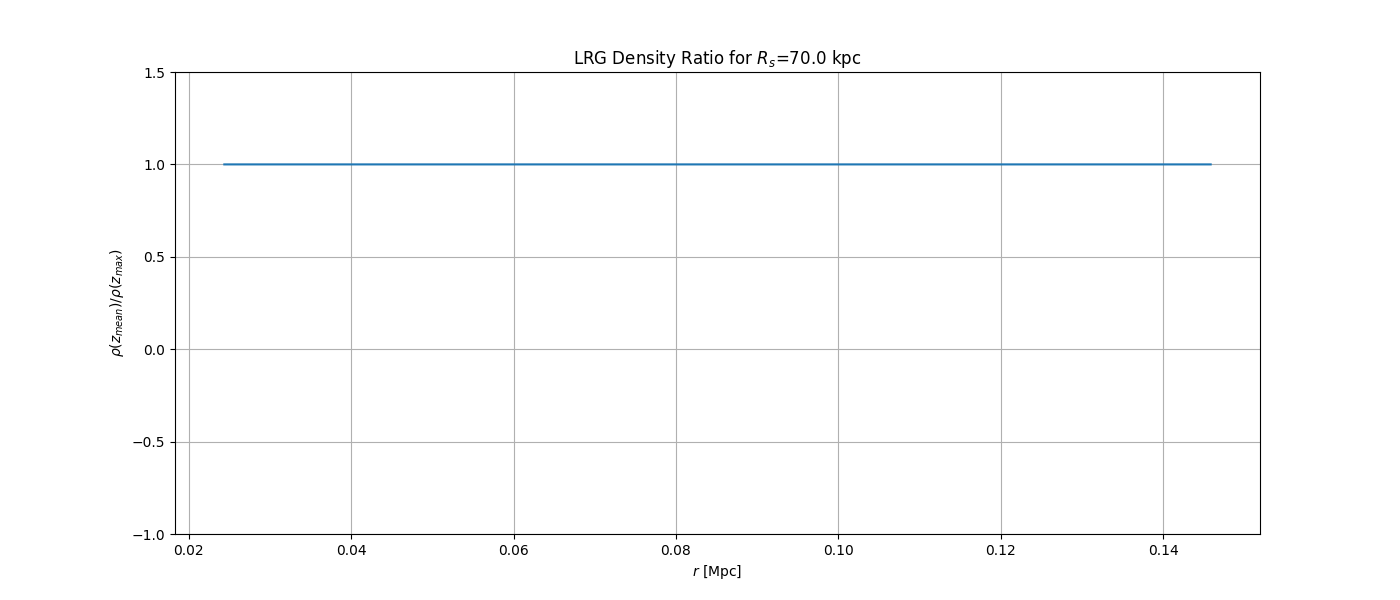

BGS:


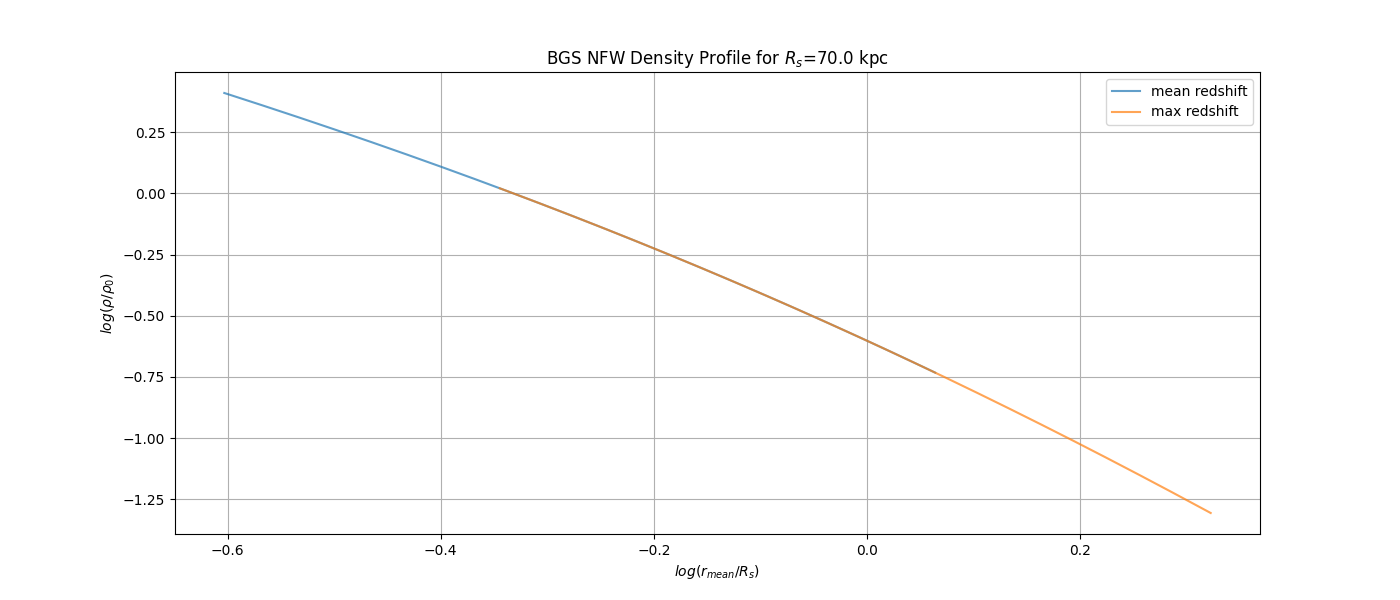

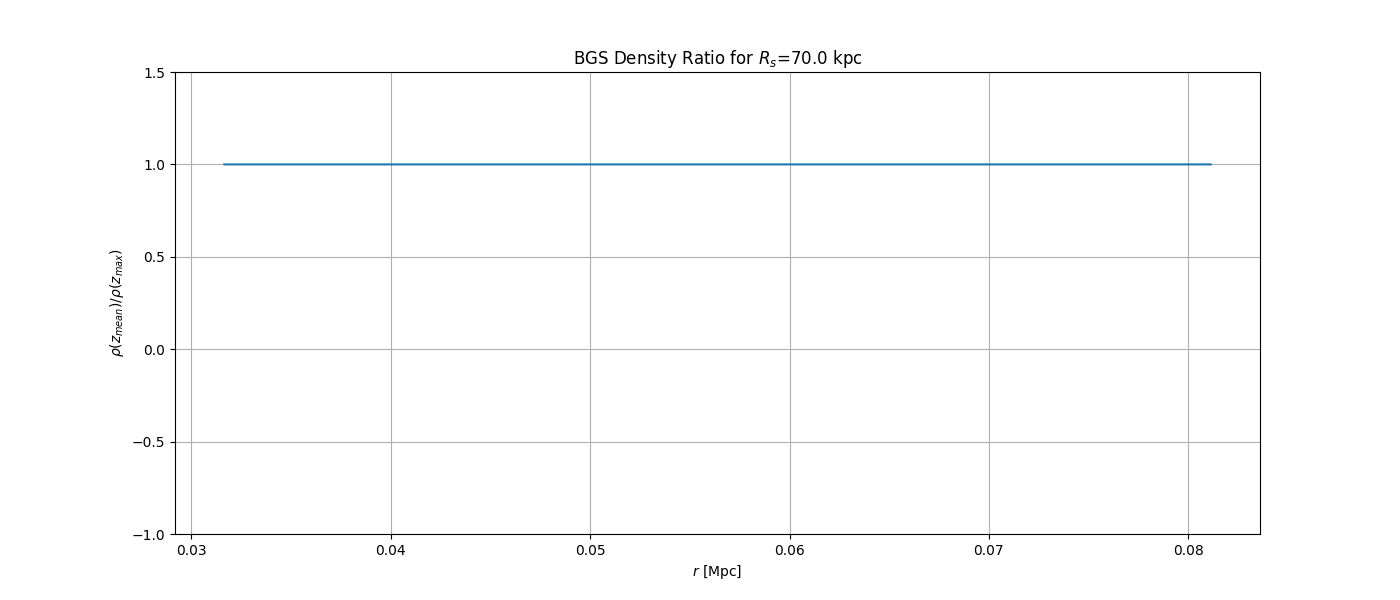

In [192]:
print("LRG:")
LRG_ρ_mean, LRG_r_mean, LRG_ρ_max, LRG_r_max = vary_angular_sep(LRG_z_mean,LRG_z_max)
print("BGS:")
BGS_ρ_mean, BGS_r_mean, BGS_ρ_max, BGS_r_max = vary_angular_sep(BGS_z_mean,BGS_z_max)